<a href="https://colab.research.google.com/github/IrfanPavel/Convolutional-Neural-Network/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# **Data Reshape**

In [ ]:
X_train_full=X_train_full.reshape(60000,28,28,1)
X_test= X_test.reshape(10000,28,28,1)

# Data **Normalization** 

In [ ]:
X_train_n= X_train_full/255
X_test_n=X_test/255

In [ ]:
X_valid, X_train= X_train_n[:5000],X_train_n[5000:]
y_valid,y_train= y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
model_history= model.fit(X_train,y_train,epochs=64,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/64
860/860 [==============================] - 34s 40ms/step - loss: 0.2064 - accuracy: 0.9251 - val_loss: 0.2785 - val_accuracy: 0.8992
Epoch 2/64
860/860 [==============================] - 35s 41ms/step - loss: 0.2023 - accuracy: 0.9264 - val_loss: 0.2643 - val_accuracy: 0.9032
Epoch 3/64
860/860 [==============================] - 35s 41ms/step - loss: 0.1987 - accuracy: 0.9273 - val_loss: 0.4578 - val_accuracy: 0.8362
Epoch 4/64
860/860 [==============================] - 38s 44ms/step - loss: 0.1947 - accuracy: 0.9290 - val_loss: 0.2810 - val_accuracy: 0.8974
Epoch 5/64
860/860 [==============================] - 35s 41ms/step - loss: 0.1931 - accuracy: 0.9290 - val_loss: 0.2583 - val_accuracy: 0.9076
Epoch 6/64
860/860 [==============================] - 35s 41ms/step - loss: 0.1874 - accuracy: 0.9320 - val_loss: 0.2542 - val_accuracy: 0.9088
Epoch 7/64
860/860 [==============================] - 35s 41ms/step - loss: 0.1840 - accuracy: 0.9325 - val_loss: 0.2692 - val_accuracy:

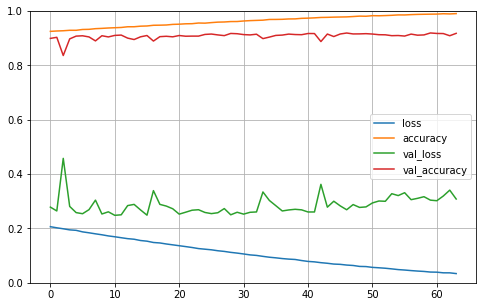

In [21]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
ev= model.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3280 - accuracy: 0.9143


In [23]:
ev

[0.3280486464500427, 0.9143000245094299]

In [24]:
X_new=X_test[:3]

In [25]:
y_pred=model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [26]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

AxesImage(54,36;334.8x217.44)


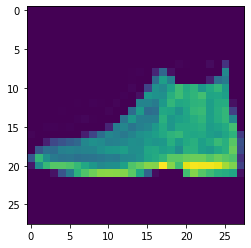

In [27]:
print(plt.imshow(X_test[0].reshape((28,28))))